# Simmulated annealing for solving traveling salesman problem.

The algorythm used:
https://github.com/perrygeo/simanneal

Dataset Quatar.
http://www.math.uwaterloo.ca/tsp/world/countries.html

In [1]:
import math
import time
import random
import pandas as pd
import numpy as np
from simanneal import Annealer
import matplotlib.pyplot as plt

### I. Definition of necessary classes and functions

In [2]:
class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!
        self.stats = pd.DataFrame(columns=['Temp', 'Energy', 'Accept', 'Improve', 'Time'])

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e
    

    
    def update(self, step, T, E, acceptance, improvement):
        """Save statistics for each iteration"""

        elapsed = time.time() - self.start
        if step == 0:
            self.stats.loc[0] = [T, E, None, None, elapsed]
        else:
            remain = (self.steps - step) * (elapsed / step)
            self.stats.loc[step] = [T, E, acceptance, improvement, elapsed]


In [3]:
def distance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 3963  # radius of Earth (miles)
    lat1, lon1 = math.radians(a.latitude), math.radians(a.longitude)
    lat2, lon2 = math.radians(b.latitude), math.radians(b.longitude)
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R


In [4]:
def getDistances(coordinates):
    """Generates distance matrics for a given locations list"""
    matrix = {}
    for c1 in coordinates.iterrows():
        matrix[c1[0]] = {}
        for c2 in coordinates.iterrows():
            if c1[0] == c2[0]:
                matrix[c1[0]][c2[0]] = 0.0
            else:
                matrix[c1[0]][c2[0]] = distance(c1[1], c2[1])
    return matrix

In [5]:
def annealTSP(init_state, distance_matrix, Tmax=25000.0, Tmin=0.01, steps=1000000, updates=10000):
    """Process the locations with a simulated annealing algorythm"""
    begin = time.time()

    tsp = TravellingSalesmanProblem(init_state, distance_matrix)
    tsp.Tmax = Tmax
    tsp.Tmin = Tmin
    tsp.steps = steps
    tsp.updates = updates
    sequence, e = tsp.anneal()
    

    while sequence[0] != 0:
        sequence = sequence[1:] + sequence[:1]  
        
    print("%i mile route:" % e)
    print(" ➞  ".join([str(i) for i in sequence]))
    print("Computational time: " + str(time.time()- begin))
    return sequence, e, tsp.stats
    

In [6]:
def plotRoute(cities, sequence):
    """Visualizes the output of the annealer"""
    plt.figure(figsize=(7,7))
    plt.scatter(cities.longitude, cities.latitude)
    for i in range(len(sequence)):
        c1 = sequence[i-1]
        c2 = sequence[i]
        plt.plot(cities.loc[[c1,c2], "longitude"], cities.loc[[c1,c2], "latitude"], color="gray")

### II. Loading the data from csv file.

In [7]:
cities = pd.read_csv('./dataqt.csv')
cities = cities/1000
cities.head()

,latitude,longitude
0,24.748333,50.840000
1,24.758889,51.211944
2,24.827222,51.394722
3,24.904444,51.175000
4,24.996111,51.548889


Two inputs are generated for annealing algorythm:
1. The initial state is the randomized sequence of city numbers
2. Distance matrix between each two cities

In [8]:
init_state = list(cities.index)
random.shuffle(init_state)
distance_matrix = getDistances(cities)

### III. Starting algorythm with default parameters

In [9]:
sequence, energy, stats = annealTSP(init_state, distance_matrix)

945 mile route:
0 ➞  3 ➞  1 ➞  2 ➞  4 ➞  11 ➞  14 ➞  18 ➞  29 ➞  26 ➞  21 ➞  28 ➞  27 ➞  23 ➞  25 ➞  10 ➞  5 ➞  7 ➞  87 ➞  92 ➞  95 ➞  94 ➞  96 ➞  91 ➞  82 ➞  69 ➞  63 ➞  67 ➞  65 ➞  60 ➞  50 ➞  57 ➞  55 ➞  66 ➞  72 ➞  76 ➞  78 ➞  80 ➞  83 ➞  99 ➞  106 ➞  107 ➞  109 ➞  111 ➞  120 ➞  128 ➞  134 ➞  142 ➞  147 ➞  135 ➞  130 ➞  117 ➞  121 ➞  108 ➞  81 ➞  58 ➞  61 ➞  88 ➞  131 ➞  133 ➞  136 ➞  139 ➞  144 ➞  148 ➞  145 ➞  177 ➞  179 ➞  169 ➞  166 ➞  161 ➞  157 ➞  146 ➞  151 ➞  152 ➞  153 ➞  156 ➞  173 ➞  172 ➞  174 ➞  176 ➞  167 ➞  165 ➞  159 ➞  154 ➞  150 ➞  132 ➞  127 ➞  123 ➞  122 ➞  119 ➞  116 ➞  115 ➞  114 ➞  104 ➞  105 ➞  102 ➞  90 ➞  77 ➞  74 ➞  75 ➞  70 ➞  24 ➞  22 ➞  12 ➞  13 ➞  16 ➞  20 ➞  17 ➞  9 ➞  8 ➞  6 ➞  15 ➞  35 ➞  62 ➞  84 ➞  85 ➞  97 ➞  103 ➞  110 ➞  129 ➞  126 ➞  124 ➞  125 ➞  113 ➞  73 ➞  68 ➞  59 ➞  56 ➞  44 ➞  46 ➞  47 ➞  52 ➞  51 ➞  53 ➞  54 ➞  49 ➞  48 ➞  43 ➞  41 ➞  34 ➞  31 ➞  30 ➞  37 ➞  40 ➞  45 ➞  42 ➞  39 ➞  33 ➞  38 ➞  36 ➞  32 ➞  71 ➞  79 ➞  86 ➞  101 ➞  112 

### IV. Parameter tuning


Optimal value for Tmax parameter is the one, where at least 98% moves are accepted
Visualising  temperature vs. acceptance rate to find Tmax

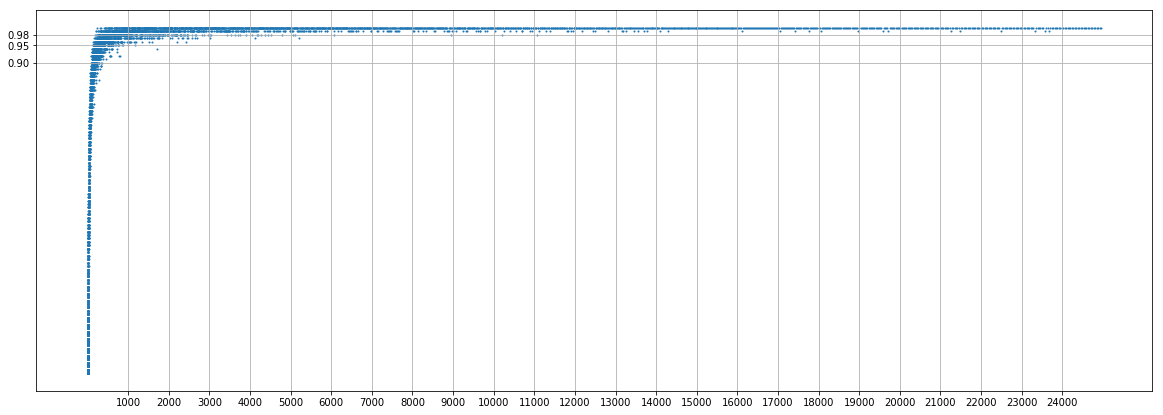

In [10]:
plt.figure(figsize=(20,7))
x = stats.Temp
y = stats.Accept
plt.xticks(range(1000, 25000, 1000))
plt.yticks([0.9, 0.95, 0.98])
plt.scatter(x,y, s=1)
plt.grid()

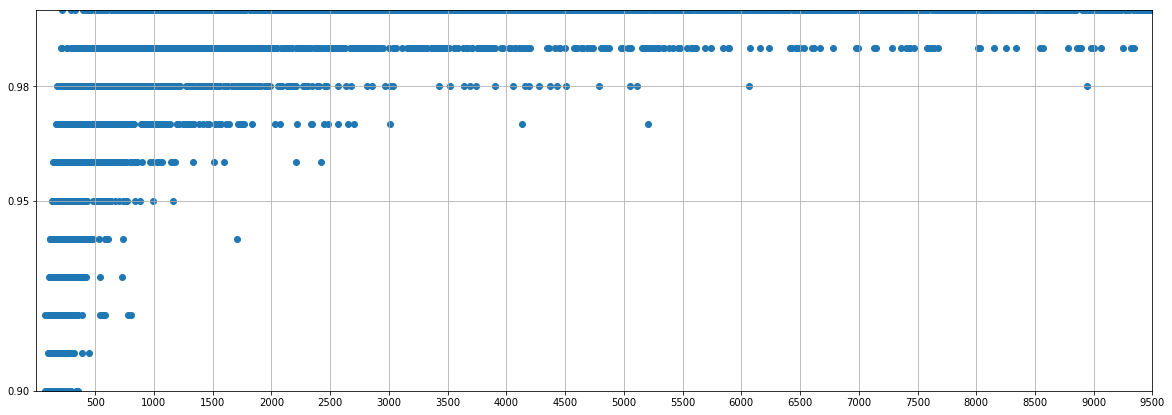

In [12]:
plt.figure(figsize=(20,7))
plt.xlim(0,5000)
plt.ylim(0.9,1)
plt.xticks(range(500, 10000, 500))
plt.yticks([0.9, 0.95, 0.98])
plt.scatter(x,y)
plt.grid()

At least 98% moves are accepted after T=5500, so we set this value as new Tmax

Optimal Tmin value is the one, where energy stops to improve significantly 
Visualising temperature vs. distance to find it

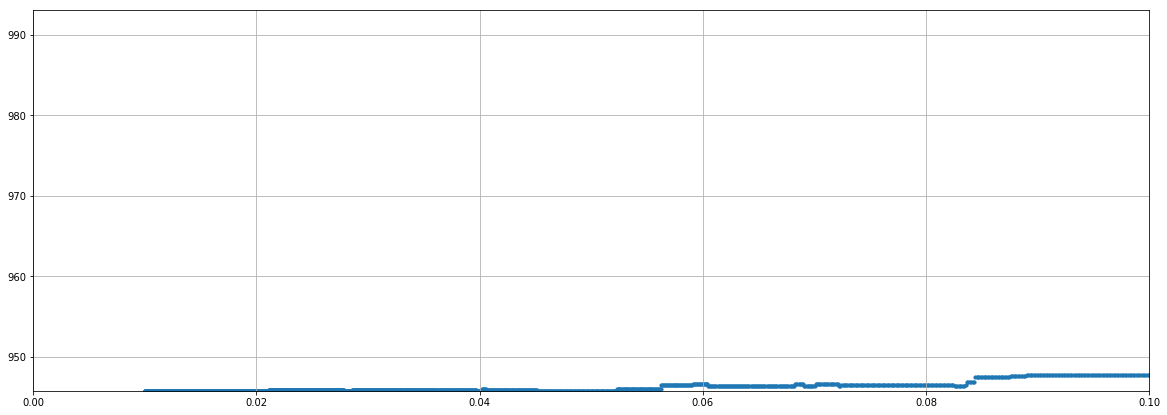

In [13]:
plt.figure(figsize=(20,7))
x = stats.Temp
y = stats.Energy
plt.ylim(min(y),min(y)*1.05)
plt.xlim(0,0.1)
#plt.xticks(np.arange(0, 3, 0.1))
plt.scatter(x,y, s=10)
plt.grid()

Energy converges at quite small values, so we will keep Tmin

To limit the number of steps we check, at which iteration the energy stops improving

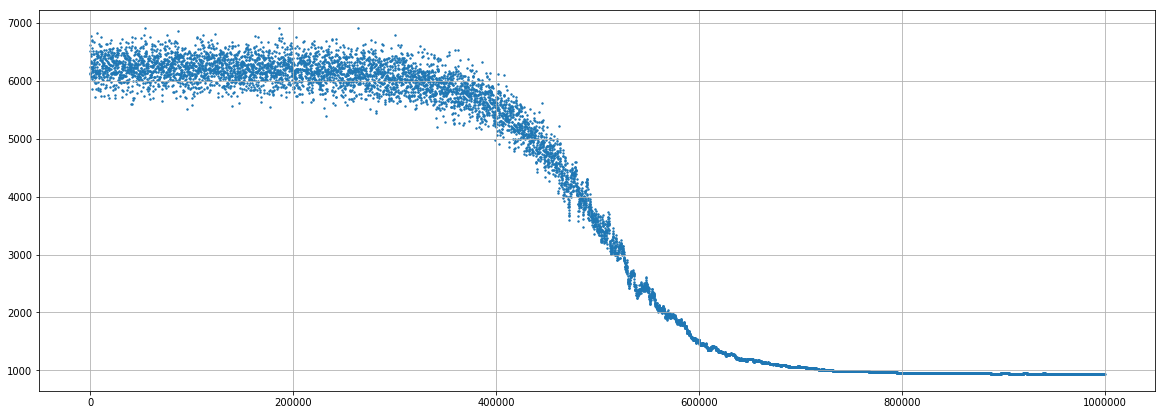

In [14]:
plt.figure(figsize=(20,7))
x = stats.index
y = stats.Energy
plt.scatter(x,y, s=2)
plt.grid()

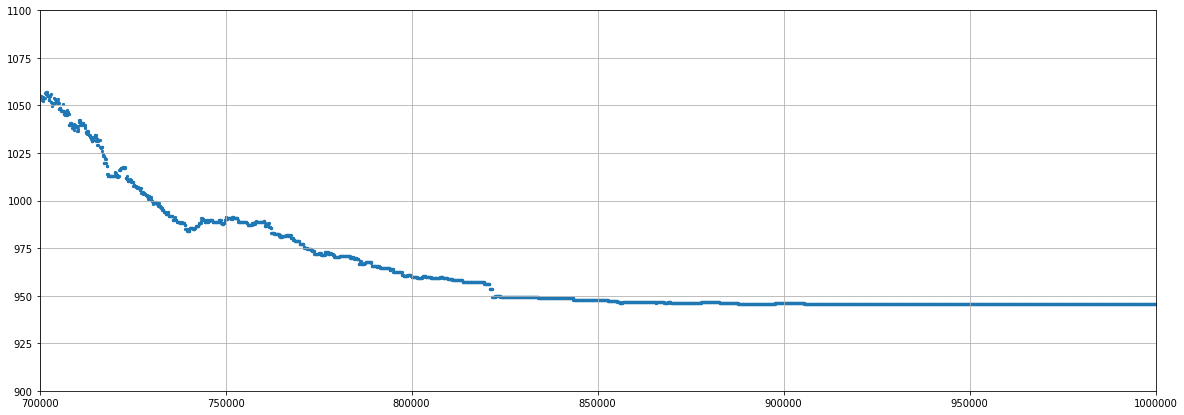

In [17]:
plt.figure(figsize=(20,7))
x = stats.index
y = stats.Energy
plt.ylim(900, 1100)
plt.xlim(700000,1000000)
plt.scatter(x,y, s=5)
plt.grid()

Energy converges closely 800000 iterations. We will limit steps to 850000

### V. Tuned model

Tmax = 5500
steps = 850000

In [24]:
sequence, energy, stats = annealTSP(init_state, distance_matrix, Tmax=5500, Tmin = 0.001, steps=850000)

936 mile route:
0 ➞  1 ➞  3 ➞  6 ➞  10 ➞  73 ➞  105 ➞  116 ➞  130 ➞  135 ➞  150 ➞  174 ➞  172 ➞  173 ➞  182 ➞  186 ➞  193 ➞  181 ➞  175 ➞  168 ➞  162 ➞  160 ➞  155 ➞  129 ➞  110 ➞  103 ➞  113 ➞  112 ➞  108 ➞  90 ➞  92 ➞  95 ➞  94 ➞  104 ➞  114 ➞  122 ➞  123 ➞  127 ➞  142 ➞  147 ➞  154 ➞  146 ➞  156 ➞  153 ➞  126 ➞  97 ➞  85 ➞  84 ➞  64 ➞  19 ➞  62 ➞  89 ➞  93 ➞  137 ➞  138 ➞  143 ➞  149 ➞  152 ➞  151 ➞  140 ➞  121 ➞  117 ➞  102 ➞  86 ➞  81 ➞  7 ➞  5 ➞  2 ➞  4 ➞  8 ➞  9 ➞  11 ➞  14 ➞  18 ➞  29 ➞  31 ➞  30 ➞  34 ➞  41 ➞  43 ➞  40 ➞  37 ➞  39 ➞  38 ➞  46 ➞  42 ➞  47 ➞  51 ➞  52 ➞  55 ➞  53 ➞  54 ➞  49 ➞  48 ➞  45 ➞  33 ➞  26 ➞  21 ➞  28 ➞  27 ➞  17 ➞  20 ➞  23 ➞  25 ➞  32 ➞  63 ➞  78 ➞  80 ➞  82 ➞  87 ➞  91 ➞  96 ➞  106 ➞  107 ➞  115 ➞  120 ➞  128 ➞  134 ➞  132 ➞  119 ➞  111 ➞  109 ➞  99 ➞  83 ➞  76 ➞  69 ➞  67 ➞  65 ➞  72 ➞  66 ➞  60 ➞  57 ➞  50 ➞  36 ➞  44 ➞  56 ➞  59 ➞  68 ➞  74 ➞  75 ➞  79 ➞  70 ➞  24 ➞  22 ➞  15 ➞  12 ➞  13 ➞  16 ➞  71 ➞  77 ➞  101 ➞  118 ➞  171 ➞  178 ➞  185 ➞  189 

#### Route visualisation

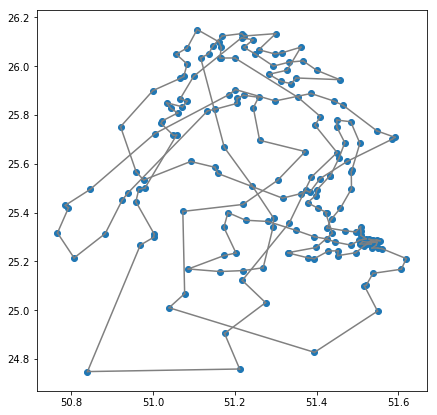

In [25]:
plotRoute(cities, sequence)

#### Convergence curve:

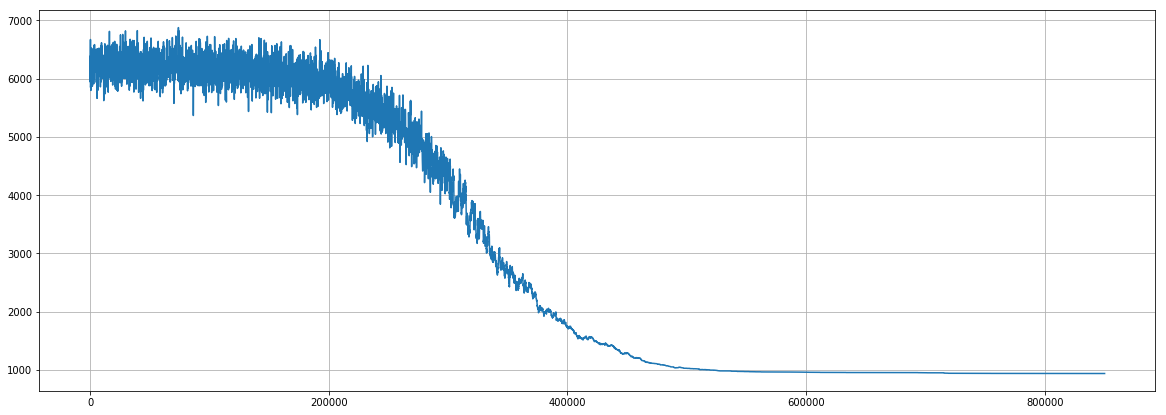

In [26]:
plt.figure(figsize=(20,7))
x = stats.index
y = stats.Energy
plt.plot(x,y)
plt.grid()